In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
print(keras.__version__)

3.4.1


In [ ]:
# Load Dataset
(train_ds, test_ds), info = tfds.load("malaria", split=['train[:80%]', 'train[80%:]'],
                                      as_supervised=True,
                                      with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [ ]:
# Resize
h = 64
w = 64
resize_layer =  tf.keras.layers.Resizing(height=h, width=w)

def resize_image(image,label):
  image = resize_layer(image)
  return image,label

train_dataset = train_ds.map(resize_image)
test_dataset = test_ds.map(resize_image)

In [ ]:
train_image=[]
train_label=[]
test_image=[]
test_label=[]

for image,label in train_dataset:
  train_image.append(image)
  train_label.append(label)

for image,label in test_dataset:
  test_image.append(image)
  test_label.append(label)

train_image = np.array(train_image)/255
train_label = np.array(train_label)
test_image = np.array(test_image)/255
test_label = np.array(test_label)

In [ ]:
# Model VGGNet
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
base_model.trainable = False

model = tf.keras.Sequential([
    tf.keras.Input(shape=(64, 64, 3)),
    base_model,

    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation="softmax")
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy']
             )
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 2, 2, 32)            │         147,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 1, 1, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,882,914 (56.77 MB)

 Trainable params: 168,226 (657.13 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
h1 = model.fit(train_image, train_label, epochs=40, batch_size=64, validation_data=(test_image, test_label))

Epoch 1/40
345/345 ━━━━━━━━━━━━━━━━━━━━ 34s 63ms/step - accuracy: 0.7760 - loss: 0.6670 - val_accuracy: 0.9211 - val_loss: 0.2300
Epoch 2/40
345/345 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9161 - loss: 0.2397 - val_accuracy: 0.9194 - val_loss: 0.2228
Epoch 3/40
345/345 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9268 - loss: 0.2116 - val_accuracy: 0.9332 - val_loss: 0.1883
Epoch 4/40
345/345 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.9304 - loss: 0.1983 - val_accuracy: 0.9225 - val_loss: 0.1957
Epoch 5/40
345/345 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9315 - loss: 0.1950 - val_accuracy: 0.9289 - val_loss: 0.1898
Epoch 6/40
345/345 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.9352 - loss: 0.1852 - val_accuracy: 0.9367 - val_loss: 0.1878
Epoch 7/40
345/345 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9386 - loss: 0.1784 - val_accuracy: 0.9338 - val_loss: 0.1798
Epoch 8/40
345/345 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9359 - loss: 0.1755 - 

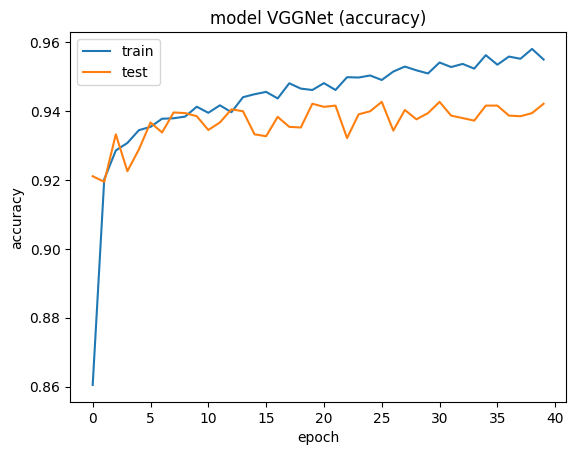

In [ ]:
# accuracy
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('model VGGNet (accuracy)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

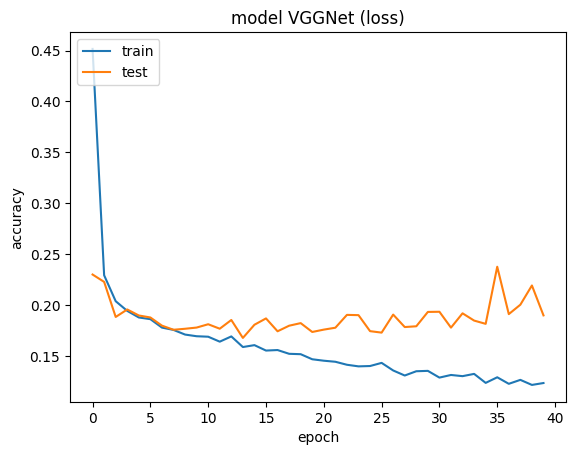

In [ ]:
# loss
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('model VGGNet (loss)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(test_image)
class_names = [
    "parasitized",
    "unimfected"
]

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(2), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

num_rows = 10
num_cols = 10
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_label, test_image)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_label)

Output hidden; open in https://colab.research.google.com to view.